In [1]:
import numpy as np
import matplotlib.pyplot as plt
import platform
import pandas as pd

In [15]:
n = 15000
t_final = 50
dt = t_final / n
#
#  Initial conditions.
#
t = np.linspace ( 0.0, t_final, n + 1 )

x = np.zeros ( n + 1 )
y = np.zeros ( n + 1 )
z = np.zeros ( n + 1 )
w = np.zeros ( n + 1 )
k = np.zeros ( n + 1 )
m = np.zeros ( n + 1 )

x[0] = 0.0 #Q11
y[0] = 0.0 #Q12
z[0] = 0.0 #Q13
w[0] = 0.0 #Q22
k[0] = 0.0 #Q23
m[0] = 0.0 #Q33

In [16]:
beta = 50
phi = 0.01
Dea = 1
xi = 1
Wi = 1
De = 0.5
lamb = 1
eta = 0.01

In [17]:
    def rk4vec ( t0, m, u0, dt, f ):
        f0 = f ( t0, m, u0 )
        t1 = t0 + dt / 2.0
        u1 = u0 + dt * f0 / 2.0
        f1 = f ( t1, m, u1 )

        t2 = t0 + dt / 2.0
        u2 = u0 + dt * f1 / 2.0
        f2 = f ( t2, m, u2 )
    
        t3 = t0 + dt
        u3 = u0 + dt * f2
        f3 = f ( t1, m, u1 )

        u = u0 + dt * ( f0 + 2.0 * f1 + 2.0 * f2 + f3 ) / 6.0

        return u
    
    def lorenz_rhs ( t, m, xyz ):
    
        dxdt = np.zeros ( 6 )
        dxdt[0] = beta * phi * (- Dea*xyz[0] + (2 - xi) * Wi * np.cos(De * t) * xyz[1])                                    #q11
        dxdt[1] = beta * phi * (- Dea*xyz[1] + Wi * np.cos(De * t)*(xyz[3] - xi/2* xyz[0] - xi/2*xyz[3] + lamb/2) + (2* eta * Wi* np.cos(De * t))) #q12
        dxdt[2] = beta * phi * (- Dea*xyz[2] + (1 - xi) * Wi * np.cos(De * t) * xyz[4])                                       #q13
        dxdt[3] = beta * phi * (- Dea* xyz[3] - xi * Wi * np.cos(De * t) * xyz[1])                            #q22
        dxdt[4] = beta * phi * (- Dea* xyz[4] - xi * Wi * np.cos(De * t) * xyz[2])                            #q23
        dxdt[5] = beta * phi * (- Dea* xyz[5])                             #q33

    # Q11 - 0, Q12 - 1, Q13 - 2, Q22 - 3, Q23 - 4, Q33 - 5
        return dxdt

In [18]:
for j in range ( 0, n ):

                    xyz = np.array ( [ x[j], y[j], z[j], w[j] , k[j] , m[j]  ] )
                    xyz = rk4vec ( t[j], 3, xyz, dt, lorenz_rhs )
    
 #   xyz2 = np.array ( [ x2[j], y2[j], z2[j], w2[j] , k2[j] , m2[j]  ] )
 #   xyz2 = rk4vec ( t[j], 3, xyz2, dt, lorenz_rhs2 )

                    x[j+1] = xyz[0]
                    y[j+1] = xyz[1]
                    z[j+1] = xyz[2]
                    w[j+1] = xyz[3]
                    k[j+1] = xyz[4]
                    m[j+1] = xyz[5]

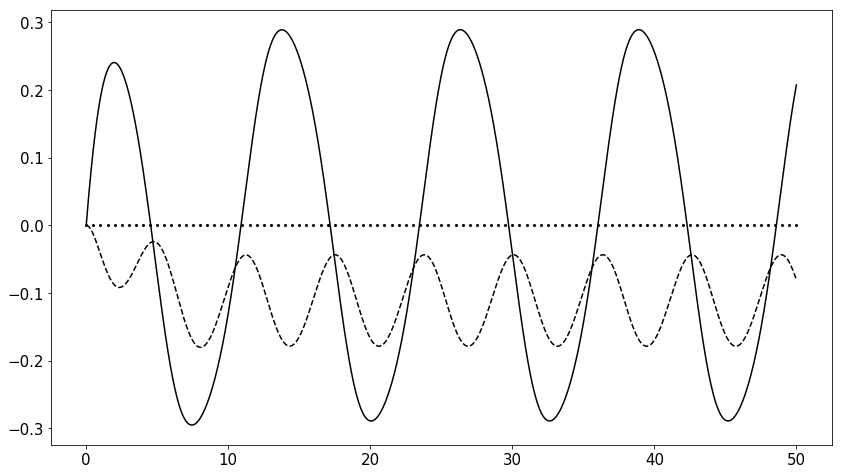

In [26]:
n1 = x - w
n22 = w - m

plt.figure(figsize=(14, 8))
plt.plot(t,n2,color='k',marker='o',markevery=150,markersize=2,linestyle=' ')
plt.plot(t,n22,color='k',linestyle='--')
plt.plot(t,y,color='k')
plt.tick_params(labelsize=15)

s = Wi * np.cos(De * t)
e = (Wi/De) * np.sin(De * t)

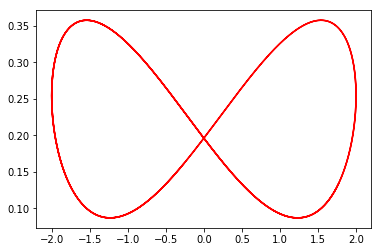

In [27]:
plt.plot(e[5000:],n1[5000:],color='r')


/home/sarinha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


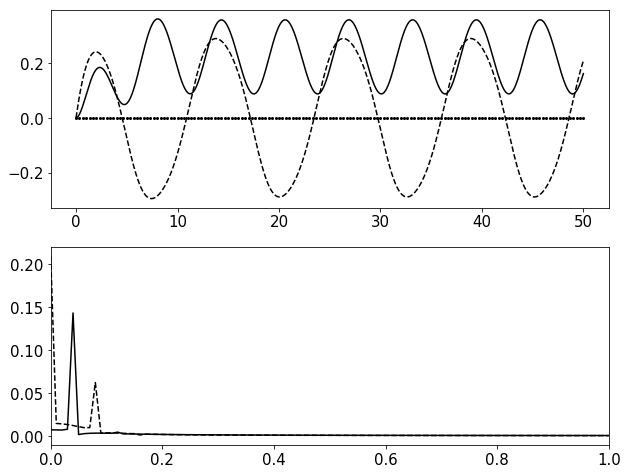

In [31]:
fig, axs = plt.subplots(2,1, figsize=(10, 8))
axs[0].plot(t,n1,color='k')
axs[0].plot(t,n2,color='k',marker='o',markevery=100,markersize=2,linestyle=' ')
axs[0].plot(t,y,color='k',linestyle='--')
axs[0].tick_params(labelsize=15)
#######################################
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack
N = 30000
# sample spacing
fa = 1/(t[1] - t[0])
T = 1.0 / fa
yf = scipy.fftpack.fft(y)
nf = scipy.fftpack.fft(n1)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

#fig, ax = plt.subplots()
#ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
#ax.plot(xf, 2.0/N * np.abs(yff[:N//2]))
#######################################


axs[1].plot(xf, 2.0/N * np.abs(yf[:N//2]),color='k')
axs[1].tick_params(labelsize=15)
axs[1].plot(xf, 2.0/N * np.abs(nf[:N//2]),color='k',linestyle='--')
plt.xlim([0,1])
plt.tick_params(labelsize=15)
#axs[0].tick_params(bottom="off", left="off",labelbottom=False,labelleft=False)
#axs[1].tick_params(bottom="off", left="off",labelbottom=False,labelleft=False)

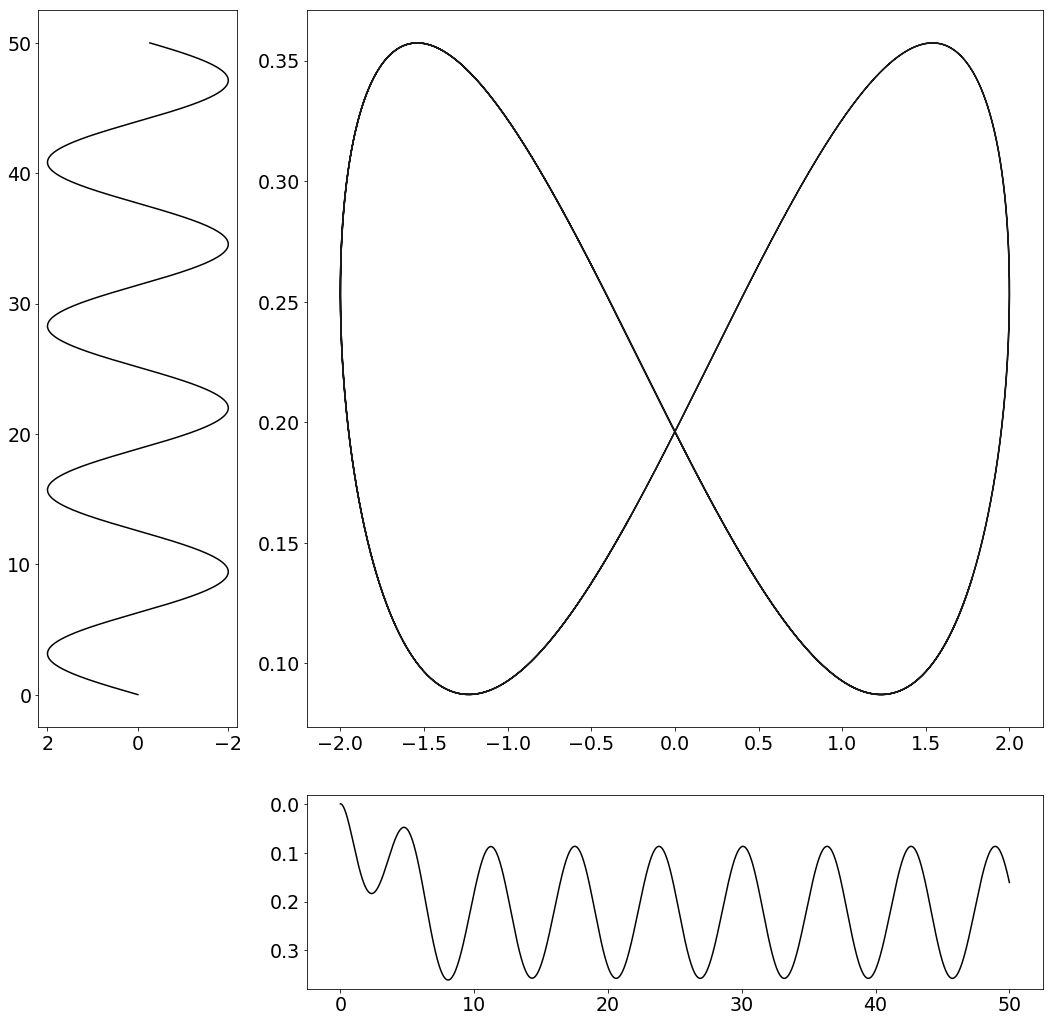

In [36]:
# Set up the axes with gridspec
fig = plt.figure(figsize=(18, 18))
grid = plt.GridSpec(4, 4, hspace=0.35, wspace=0.35)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0])
x_hist = fig.add_subplot(grid[-1, 1:])

# scatter points on the main axes
main_ax.plot(e[5000:], n1[5000:], 'k', alpha=0.9)
main_ax.tick_params(labelsize=19)
# histogram on the attached axes
x_hist.plot(t, n1, color='k')
x_hist.invert_yaxis()
x_hist.tick_params(labelsize=19)
y_hist.plot(e, t, color='k')
y_hist.invert_xaxis()
y_hist.tick_params(labelsize=19)